In [1]:
import pathlib
import geopandas
import geopandas as gpd
import pandas
import numpy
import numpy as np
import pandas as pd

from scipy.stats import truncnorm
from scipy import stats
import seaborn as sns

import random


import matplotlib.pyplot as plt

In [2]:
from matplotlib.patches import Polygon
import seaborn as sns 

In [3]:
def polygon(axes, x1, y1, x2, y2, c):
    """
    @Definition:
                A function to create polygon
    @Arguments:
                axes (matplotlib axis):
                            Axis of matplotlib subplot
                x1, y1, x2, y2 (float):
                            Coordinates of head (x1, y1) and tail (x2, y2) in matplotlib plot
                c (each color in cmap):
                            Each color in cmap
    @Returns:
                None
    """
    # Make the PDF become a colorbar
    y1=y2=0.03
    
    # Create polygon
    polygon = Polygon(
        [(x1, y1), (x2, y2), (x2, 0), (x1, 0)], color=c
    )

    # Add polygon into patch
    axes.add_patch(polygon)
    
def rainbow_fill_sns(axes, bin_data, X, Y, ylimit, cmap):
    """
    @Definition:
                A function to create polygon
    @Arguments:
                axes (matplotlib axis):
                            Axis of matplotlib subplot
                bin_data (array):
                            An array of quantiles
                ylimit (float):
                            Value represents the limit of y axis
                X, Y (float):
                            Two list of x and y labels of density plot
                cmap (each color in cmap):
                            Cmap color
    @Returns:
                None
    """
    # Get the size of the data (how many values)
    N = Y.size

    # Create sub-color from main color
    kde_df = pd.DataFrame(data={'kde':X}) # Create dataframe for labels of x axis
    kde_df['color'] = pd.cut(
        kde_df['kde'], bin_data,
        labels=[cmap(x/(bin_data.size-2)) for x in range(bin_data.size-1)],
        ordered=False
    ) # Create groups following range of values from bin_data and label it with sub-color
    kde_df['color'][0] = kde_df['color'][1] # Color the first group otherwise it would be Nan

    # Make the bottom x axis start at 0 of y axis
    axes.set_ylim(top=ylimit, bottom=0)

    # Plot each vertical color
    for n, (x, y) in enumerate(zip(X, Y)):
        # Use polygon
        if n+1 == N: continue
        polygon(axes, x, y, X[n+1], Y[n+1], kde_df['color'][n])

In [4]:
width_simulations = pd.read_csv(fr"S:\Bathymetry\version012\neal_width_001\1_bathy\bathy_analyses\para_width_neal.csv")
coords = pd.read_csv(fr"S:\Bathymetry\version012\neal_width_001\1_bathy\bathy_analyses\coord_width_neal.csv")
depth_simulations = pd.read_csv(fr"S:\Bathymetry\versions010\neal_width_001\1_bathy\bathy_analyses\depth_width_neal.csv")
ori_para = pd.read_csv(fr"S:\Bathymetry\versions010\neal_width_001\1_bathy\bathy_analyses\original_para_widths_mean_0.25km.csv")
ori_depth_bed_wse = pd.read_csv(fr"S:\Bathymetry\versions010\neal_width_001\1_bathy\bathy_analyses\ori_depth_bed_wse.csv")

In [5]:
width_simulations_filter = width_simulations[:675].copy(deep=True)
coords_filter = coords[:675].copy(deep=True)
depth_simulations_filter = depth_simulations[:675].copy(deep=True)
ori_para_filter = ori_para[:675].copy(deep=True)
ori_depth_bed_wse_filter = ori_depth_bed_wse[:675].copy(deep=True)

In [6]:
width_simulations_filter_copy = width_simulations_filter.copy(deep=True)
depth_simulations_filter_copy = depth_simulations_filter.copy(deep=True)
ori_para_filter_copy = ori_para_filter.copy(deep=True)
ori_depth_bed_wse_filter_copy = ori_depth_bed_wse_filter.copy(deep=True)

In [7]:
width_simulations_filter_copy['mean'] = width_simulations_filter.mean(axis=1)
width_simulations_filter_copy['sd'] = width_simulations_filter.std(axis=1)
width_simulations_filter_copy['cv'] = width_simulations_filter.std(axis=1) / width_simulations_filter.mean(axis=1) * 100

In [8]:
depth_simulations_filter_copy['mean'] = depth_simulations_filter.mean(axis=1)
depth_simulations_filter_copy['sd'] = depth_simulations_filter.std(axis=1)
depth_simulations_filter_copy['cv'] = depth_simulations_filter.std(axis=1) / depth_simulations_filter.mean(axis=1) * 100

### Para

In [10]:
depth_simulations_rupp = pd.read_csv(fr"S:\Bathymetry\versions010\rupp_width_001\1_bathy\bathy_analyses\depth_width_rupp.csv")
ori_para_rupp = pd.read_csv(fr"S:\Bathymetry\versions010\rupp_width_001\1_bathy\bathy_analyses\original_para_widths_mean_0.25km.csv")
ori_depth_bed_wse_rupp = pd.read_csv(fr"S:\Bathymetry\versions010\rupp_width_001\1_bathy\bathy_analyses\ori_depth_bed_wse.csv")

In [11]:
depth_simulations_filter_rupp = depth_simulations_rupp[:675].copy(deep=True)
ori_para_filter_rupp = ori_para_rupp[:675].copy(deep=True)
ori_depth_bed_wse_filter_rupp = ori_depth_bed_wse_rupp[:675].copy(deep=True)

In [12]:
depth_simulations_filter_copy_rupp = depth_simulations_filter_rupp.copy(deep=True)
ori_para_filter_copy_rupp = ori_para_filter_rupp.copy(deep=True)
ori_depth_bed_wse_filter_copy_rupp = ori_depth_bed_wse_filter_rupp.copy(deep=True)

In [13]:
depth_simulations_filter_copy_rupp['mean'] = depth_simulations_filter_rupp.mean(axis=1)
depth_simulations_filter_copy_rupp['sd'] = depth_simulations_filter_rupp.std(axis=1)
depth_simulations_filter_copy_rupp['cv'] = depth_simulations_filter_rupp.std(axis=1) / depth_simulations_filter_rupp.mean(axis=1) * 100

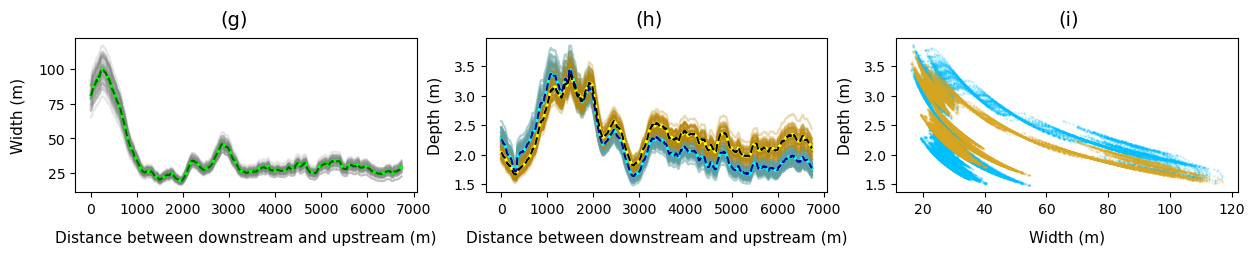

In [43]:
fig, ax = plt.subplots(1, 3, figsize=(15, 2))

fontsize=11
labelpad=10


# Mean
ax[0].plot(
    coords_filter.distance[:675],
    width_simulations_filter_copy['mean'][:675],
    alpha=1,
    color='lime',
    linewidth=2,
    label='Mean of simulations',
    zorder=1
)

# Original
ax[0].plot(
    coords_filter.distance[:675],
    ori_para_filter_copy['z'][:675],
    alpha=1,
    color='darkgreen',
    linestyle='--',
    label='Estimated parameter from GeoFabrics',
    zorder=2,
)


for i in range(1, 51, 1):
    ax[0].plot(
        coords_filter.distance[:675],
        width_simulations_filter_copy[f'sim{i}'][:675],
        alpha=0.5 if i == 1 else 0.2,
        color='grey',
        label="Simulated parameters" if i == 1 else "",
        zorder=0
    )
    
ax[0].set_ylabel('Width (m)', fontsize=fontsize, labelpad=labelpad)
ax[0].set_xlabel('Distance between downstream and upstream (m)', fontsize=fontsize, labelpad=labelpad)
    
    
# #######################
# ---------------------

# Mean
ax[1].plot(
    coords_filter.distance[:675],
    ori_depth_bed_wse_filter_copy['depth'][:675],
    alpha=1,
    color='darkblue',
    linestyle='--',
    label='UF - Estimated depth from GeoFabrics',
    zorder=2
)

# Original
ax[1].plot(
    coords_filter.distance[:675],
    depth_simulations_filter_copy['mean'][:675],
    alpha=1,
    color='aqua',
    linewidth=2,
    label='UF - Mean of simulations',
    zorder=1
)


for i in range(1, 51, 1):
    ax[1].plot(
        coords_filter.distance[:675],
        depth_simulations_filter_copy[f'sim{i}'][:675],
        alpha=0.5,
        color='cadetblue',
        label='UF - Simulated depths' if i == 1 else '',
        zorder=0
    )
    
# -----------------------

# Mean
ax[1].plot(
    coords_filter.distance[:675],
    ori_depth_bed_wse_filter_copy_rupp['depth'][:675],
    alpha=1,
    color='black',
    linestyle='--',
    label='CMR - Estimated depth from GeoFabrics',
    zorder=2
)

# Original
ax[1].plot(
    coords_filter.distance[:675],
    depth_simulations_filter_copy_rupp['mean'][:675],
    alpha=1,
    color='yellow',
    linewidth=2,
    label='CMR - Mean of simulations',
    zorder=1
)


for i in range(1, 51, 1):
    ax[1].plot(
        coords_filter.distance[:675],
        depth_simulations_filter_copy_rupp[f'sim{i}'][:675],
        alpha=0.3,
        color='darkgoldenrod',
        label='CMR - Simulated depths' if i == 1 else '',
        zorder=0
    )
    
ax[1].set_xlabel('Distance between downstream and upstream (m)', fontsize=fontsize, labelpad=labelpad)
ax[1].set_ylabel('Depth (m)', fontsize=fontsize, labelpad=labelpad-2)
ax[1].locator_params(nbins=6, axis='y')

    
# ###################
# -------------------
for i in range(1, 51):
    ax[2].scatter(
        width_simulations_filter[f'sim{i}'],
        depth_simulations_filter[f'sim{i}'],
        color='deepskyblue',
        marker='.',
        s=1,
        alpha=0.3,
        zorder=0
    )
    
    ax[2].scatter(
        width_simulations_filter[f'sim{i}'],
        depth_simulations_filter_rupp[f'sim{i}'],
        color='goldenrod',
        marker='.',
        s=1,
        alpha=0.3,
        zorder=1
    )
    
ax[2].set_ylabel('Depth (m)', fontsize=fontsize, labelpad=labelpad-2)
ax[2].set_xlabel('Width (m)', fontsize=fontsize, labelpad=labelpad)
ax[2].locator_params(nbins=6, axis='y')

ax[0].text(3100, 135, '(g)', fontsize=14, horizontalalignment='center',
           verticalalignment='center', linespacing=3.8)
ax[1].text(3200, 4.3, '(h)', fontsize=14, horizontalalignment='center',
           verticalalignment='center', linespacing=3.8)
ax[1].text(12300, 4.3, '(i)', fontsize=14, horizontalalignment='center',
           verticalalignment='center', linespacing=3.8)

# Save fig
fig.savefig(
    r"P:\Martin_publication\Bathymetry\All_results\formula\S3_width_bathymetry.jpg",
    bbox_inches='tight', dpi=600
)

### Para

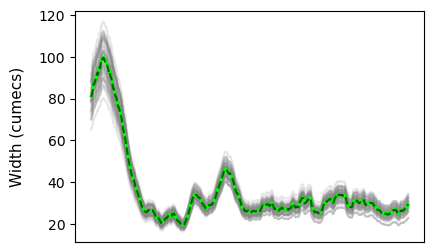

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3))

fontsize=11
labelpad=10


# Mean
ax.plot(
    coords_filter.distance[:675],
    width_simulations_filter_copy['mean'][:675],
    alpha=1,
    color='lime',
    linewidth=2,
    label='Mean of simulations',
    zorder=1
)

# Original
ax.plot(
    coords_filter.distance[:675],
    ori_para_filter_copy['z'][:675],
    alpha=1,
    color='darkgreen',
    linestyle='--',
    label='Estimated parameter from GeoFabrics',
    zorder=2,
)


for i in range(1, 51, 1):
    ax.plot(
        coords_filter.distance[:675],
        width_simulations_filter_copy[f'sim{i}'][:675],
        alpha=0.5 if i == 1 else 0.2,
        color='grey',
        label="Simulated parameters" if i == 1 else "",
        zorder=0
    )
    
ax.set_ylabel('Width (cumecs)', fontsize=fontsize, labelpad=fontsize-1) 
ax.tick_params(bottom=False)
ax.set_xticks([])

# Save fig
fig.savefig(
    r"P:\Martin_publication\Bathymetry\All_results\formula\S3_width_distance.jpg",
    bbox_inches='tight', dpi=600
)

### Depth

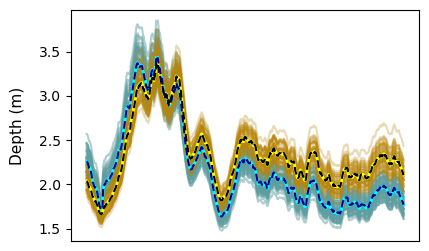

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3))

fontsize=11
labelpad=10

# Mean
ax.plot(
    coords_filter.distance[:675],
    ori_depth_bed_wse_filter_copy['depth'][:675],
    alpha=1,
    color='darkblue',
    linestyle='--',
    label='UF - Estimated depth from GeoFabrics',
    zorder=2
)

# Original
ax.plot(
    coords_filter.distance[:675],
    depth_simulations_filter_copy['mean'][:675],
    alpha=1,
    color='aqua',
    linewidth=2,
    label='UF - Mean of simulations',
    zorder=1
)


for i in range(1, 51, 1):
    ax.plot(
        coords_filter.distance[:675],
        depth_simulations_filter_copy[f'sim{i}'][:675],
        alpha=0.5,
        color='cadetblue',
        label='UF - Simulated depths' if i == 1 else '',
        zorder=0
    )
    
# -----------------------

# Mean
ax.plot(
    coords_filter.distance[:675],
    ori_depth_bed_wse_filter_copy_rupp['depth'][:675],
    alpha=1,
    color='black',
    linestyle='--',
    label='CMR - Estimated depth from GeoFabrics',
    zorder=2
)

# Original
ax.plot(
    coords_filter.distance[:675],
    depth_simulations_filter_copy_rupp['mean'][:675],
    alpha=1,
    color='yellow',
    linewidth=2,
    label='CMR - Mean of simulations',
    zorder=1
)


for i in range(1, 51, 1):
    ax.plot(
        coords_filter.distance[:675],
        depth_simulations_filter_copy_rupp[f'sim{i}'][:675],
        alpha=0.3,
        color='darkgoldenrod',
        label='CMR - Simulated depths' if i == 1 else '',
        zorder=0
    )
    
ax.set_ylabel('Depth (m)', fontsize=fontsize, labelpad=fontsize-1) 
ax.tick_params(bottom=False)
ax.set_xticks([])
    
# Save fig
fig.savefig(
    r"P:\Martin_publication\Bathymetry\All_results\formula\S3_width_depth_distance.jpg",
    bbox_inches='tight', dpi=600
)

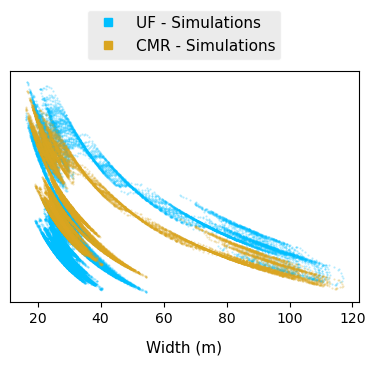

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3))

fontsize=11
labelpad=10

# ###################
# -------------------
for i in range(1, 51):
    ax.scatter(
        width_simulations_filter[f'sim{i}'],
        depth_simulations_filter[f'sim{i}'],
        color='deepskyblue',
        marker='.',
        s=1,
        alpha=0.3,
        zorder=0
    )
    
    ax.scatter(
        width_simulations_filter[f'sim{i}'],
        depth_simulations_filter_rupp[f'sim{i}'],
        color='goldenrod',
        marker='.',
        s=1,
        alpha=0.3,
        zorder=1
    )
    
ax.set_yticks([])
ax.tick_params(left=False)
ax.set_xlabel('Width (m)', fontsize=fontsize, labelpad=labelpad)

ax.plot([], [], 's', linewidth=1, color='deepskyblue', label='UF - Simulations') # CMR
ax.plot([], [], 's', linewidth=1, color='goldenrod', label='CMR - Simulations') # UF

legend2 = ax.legend(fontsize=fontsize, frameon=True, bbox_to_anchor=(0.8, 1.3))

frame2 = legend2.get_frame()
frame2.set_facecolor('0.90')
legend2.get_frame().set_edgecolor('w')

# Save fig
fig.savefig(
    r"P:\Martin_publication\Bathymetry\All_results\formula\S3_width_depth_relationship.jpg",
    bbox_inches='tight', dpi=600
)